<a href="https://colab.research.google.com/github/diegoturenne/Application-Oriented-Deep-Learning-Course-2022-UU/blob/main/Copy_of_Exercise_05_01_DT_FD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5.1


In [ ]:
from IPython.core.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

#width for some images
im_width = 11

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Simple Network**

We continue with the dataset first encountered in the previous exercise. Please refer to the discussion there for an introduction to the data and the learning objective.

Here, we manually implement a simple network architecture

In [ ]:
# The code snippet below is responsible for downloading the dataset
# - for example when running via Google Colab.
#
# You can also directly download the file using the link if you work
# with a local setup (in that case, ignore the !wget)

# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
    


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  258k  100  258k    0     0   189k      0  0:00:01  0:00:01 --:--:--  189k


In [ ]:
# Before working with the data, 
# we download and prepare all features

# load all examples from the file
data = np.genfromtxt('winequality-white.csv',delimiter=";",skip_header=1)

print("data:", data.shape)

# Prepare for proper training
np.random.shuffle(data) # randomly sort examples

# take the first 3000 examples for training
# (remember array slicing from last week)
X_train = data[:3000,:11] # all features except last column
y_train = data[:3000,11]  # quality column

# and the remaining examples for testing
X_test = data[3000:,:11] # all features except last column
y_test = data[3000:,11] # quality column

print("First example:")
print("Features:", X_train[0])
print("Quality:", y_train[0])

data: (4898, 12)
First example:
Features: [7.600e+00 2.400e-01 4.400e-01 3.800e+00 3.700e-02 4.900e+01 1.460e+02
 9.911e-01 3.060e+00 3.700e-01 1.160e+01]
Quality: 6.0


# Problems

The goal is to implement the training of a neural network with one input layer, one hidden layer, and one output layer using gradient descent. We first (below) define the matrices and initialise with random values. We need W, b, W' and b'. The shapes will be:
  * W: (number of hidden nodes, number of inputs) named `W`
  * b: (number of hidden nodes) named `b`
  * W': (number of hidden nodes) named `Wp`
  * b': (one) named `bp`

Your tasks are:     
   * Implement a forward pass of the network as `dnn` (see below)
   * Implement a function that uses one data point to update the weights using gradient descent. You can follow the `update_weights` skeleton below
   * Now you can use the code below (training loop and evaluation) to train the network for multiple data points and even over several epochs. Try to find a set of hyperparameters (number of nodes in the hidden layer, learning rate, number of training epochs) that gives stable results. What is the best result (as measured by the loss on the training sample) you can get?

In [ ]:
# Initialise weights with suitable random distributions
hidden_nodes = 50 # number of nodes in the hidden layer
n_inputs = 11 # input features in the dataset

W = np.random.randn(hidden_nodes,11)*np.sqrt(2./n_inputs)
b = np.random.randn(hidden_nodes)*np.sqrt(2./n_inputs)
Wp = np.random.randn(hidden_nodes)*np.sqrt(2./hidden_nodes)
bp = np.random.randn((1))

print(W.shape)

(50, 11)


In [ ]:
# You can use this implementation of the ReLu activation function
def relu(x):
    return np.maximum(x, 0)

In [ ]:
def dnn(x,W,b,Wp,bp):
    # TODO Calculate and return network output of forward pass
    # See Hint 1 for additional information
    z1 = np.matmul(W,x) + b # weight the inputs
    z2 = relu(z1) # non linear activation: now going away from hidden node and into ouput 
    z3 = np.matmul(Wp, z2) + bp # out from all hidden nodes into single quality
    
    return z3 # output: single quality number 

In [ ]:
# # test cell for forward dnn 
# x_test_dt = X_train[100]
# y_test_dt = y_train[100]

# y_prop_test_dy = dnn(x_test_dt,W,b,Wp,bp)

# y_prop_test_dy

In [ ]:
def update_weights(x,y, W, b, Wp, bp):
    
    learning_rate = 1e-5 # it's a real dick move to suggest the wrong learning rate by default.
    # if you wanted us to choose, just say it or don't input anything.
    
    # TODO: Calculate the network output (use the function dnn defined above)
    y_out = dnn(x,W, b, Wp, bp) 
    # TODO: Derive the gradient for each of W,b,Wp,bp by taking the partial
    # derivative of the loss function with respect to the variable and

    # I ended up needing to implement an ugly loop instead to some vector calculation to check the values .... 
    # As just a direct implementation of the formulas (thus the commented loops)
    
    sum_tmp = np.dot(W,x) + b  #calculation that is used often for the  derivatives

    dL_dbp = 2*(y_out - y)  
    
    dL_db = dL_dbp *  Wp* np.heaviside(sum_tmp, 0.5) 
#     dL_db = np.zeros_like(b)
#     for k in np.arange(len(b)):
#         s = 0 
#         for i in np.arange(len(x)):
#             s += W[k,i]*x[i]
#         s2 = s + b[k]
#         dL_db[k] = dL_dbp*Wp[k]*np.heaviside(s2, 0.5)
        

    dL_dWp = dL_dbp * relu(sum_tmp)
#     dL_dWp = np.zeros_like(Wp)
#     for k in np.arange(len(Wp)):
#         s = 0 
#         for i in np.arange(len(x)):
#             s += W[k,i]*x[i]
#         s2 = s + b[k]
#         dL_dWp[k] = dL_dbp*relu(s2)
  
    
    dL_dW = dL_dbp* np.outer(Wp * np.heaviside(sum_tmp, 0.5) , x)      
#     dL_dW = np.zeros_like(W)
#     for m in np.arange(W.shape[0]):
#         for k in np.arange(W.shape[1]):
#             s=0
#             for i in np.arange(len(x)):
#                 s += W[m,i]*x[i]
#             s2 = s + b[m]
#             dL_dW[m,k] = dL_dbp*Wp[m]*np.heaviside(s2, 0.5)*x[k]
            

    # TODO: Update the weights/bias following the rule:  weight_new = weight_old - learning_rate * gradient    
    bp_new = bp - learning_rate*dL_dbp
    b_new = b - learning_rate*dL_db
    Wp_new = Wp - learning_rate*dL_dWp
    W_new = W - learning_rate*dL_dW
    #.... at least it has the right shapes... 
    
#     return dL_db
    return W_new, b_new, Wp_new, bp_new # return the new weights


# Training loop and evaluation below

Epoch: 0 Train Loss: 0.7993169364945579 Test Loss: 0.7798091883825501
Epoch: 1 Train Loss: 0.780319875713755 Test Loss: 0.7639703616218164
Epoch: 2 Train Loss: 0.7632282969190204 Test Loss: 0.7493125451226721
Epoch: 3 Train Loss: 0.747741896816861 Test Loss: 0.7395026372453749
Epoch: 4 Train Loss: 0.7384594740854185 Test Loss: 0.7322581458880436
Epoch: 5 Train Loss: 0.734128780424642 Test Loss: 0.727539045362166
Epoch: 6 Train Loss: 0.7319836518098473 Test Loss: 0.7263702511469026
Epoch: 7 Train Loss: 0.7112011759763813 Test Loss: 0.7162702596404792
Epoch: 8 Train Loss: 0.7015789965846678 Test Loss: 0.7080777199128364
Epoch: 9 Train Loss: 0.6938591177404999 Test Loss: 0.6998914491590358
Epoch: 10 Train Loss: 0.6895113069056811 Test Loss: 0.6950723426642893
Epoch: 11 Train Loss: 0.6853510504796014 Test Loss: 0.6910516878948043
Epoch: 12 Train Loss: 0.6827070654081017 Test Loss: 0.6882521232880313
Epoch: 13 Train Loss: 0.6798426996954452 Test Loss: 0.6849535993671222
Epoch: 14 Train Loss

Epoch: 116 Train Loss: 0.6095424355055856 Test Loss: 0.6414278685855634
Epoch: 117 Train Loss: 0.6091372286744696 Test Loss: 0.6414940796171494
Epoch: 118 Train Loss: 0.6088915481374608 Test Loss: 0.6417155398098688
Epoch: 119 Train Loss: 0.6083800358984923 Test Loss: 0.6415299568238407
Epoch: 120 Train Loss: 0.6081448264021495 Test Loss: 0.6417258438403206
Epoch: 121 Train Loss: 0.6079787789236742 Test Loss: 0.6419126082368042
Epoch: 122 Train Loss: 0.6078808925348598 Test Loss: 0.6420713277415657
Epoch: 123 Train Loss: 0.6075076618033802 Test Loss: 0.6421534997882927
Epoch: 124 Train Loss: 0.6072224668959043 Test Loss: 0.6421951522891586
Epoch: 125 Train Loss: 0.606825467078241 Test Loss: 0.6420838672033784
Epoch: 126 Train Loss: 0.606406143357311 Test Loss: 0.6420278034866311
Epoch: 127 Train Loss: 0.6066240265631745 Test Loss: 0.6423902401855643
Epoch: 128 Train Loss: 0.6059730268414703 Test Loss: 0.6420683600182708
Epoch: 129 Train Loss: 0.6059373071068852 Test Loss: 0.64218869949

Epoch: 231 Train Loss: 0.5831594963883685 Test Loss: 0.6283747414929556
Epoch: 232 Train Loss: 0.5831736292359044 Test Loss: 0.628341428514906
Epoch: 233 Train Loss: 0.583089300763453 Test Loss: 0.628156041871777
Epoch: 234 Train Loss: 0.5831023867110812 Test Loss: 0.6282685080175372
Epoch: 235 Train Loss: 0.5829245487703901 Test Loss: 0.6279736927060445
Epoch: 236 Train Loss: 0.5830143618257327 Test Loss: 0.6280736918537758
Epoch: 237 Train Loss: 0.5828477730208004 Test Loss: 0.6282226691700608
Epoch: 238 Train Loss: 0.5827068438941813 Test Loss: 0.6279201481892152
Epoch: 239 Train Loss: 0.5826986849289933 Test Loss: 0.6280709872754638
Epoch: 240 Train Loss: 0.5825419390158338 Test Loss: 0.6277398245589396
Epoch: 241 Train Loss: 0.5824625076071414 Test Loss: 0.6276689408746767
Epoch: 242 Train Loss: 0.5823081018596493 Test Loss: 0.6277425743403602
Epoch: 243 Train Loss: 0.5824598548957571 Test Loss: 0.6277258217648032
Epoch: 244 Train Loss: 0.5822167289187352 Test Loss: 0.627843557822

Epoch: 346 Train Loss: 0.5734299029356207 Test Loss: 0.6259888540119644
Epoch: 347 Train Loss: 0.5734923756801228 Test Loss: 0.6260487277881023
Epoch: 348 Train Loss: 0.5732690021728946 Test Loss: 0.6257191123961815
Epoch: 349 Train Loss: 0.5734076951811578 Test Loss: 0.6255046917482311
Epoch: 350 Train Loss: 0.5732484412103671 Test Loss: 0.6258812117863873
Epoch: 351 Train Loss: 0.5730258505792275 Test Loss: 0.6253881005013807
Epoch: 352 Train Loss: 0.5731970893032465 Test Loss: 0.6256083612183925
Epoch: 353 Train Loss: 0.5730671474316149 Test Loss: 0.6256236867603348
Epoch: 354 Train Loss: 0.5731068225215329 Test Loss: 0.6257524629448432
Epoch: 355 Train Loss: 0.5730004376080627 Test Loss: 0.6255419073974694
Epoch: 356 Train Loss: 0.5730004097046654 Test Loss: 0.6252543812584859
Epoch: 357 Train Loss: 0.5729343204315523 Test Loss: 0.625865914761819
Epoch: 358 Train Loss: 0.5728353382558173 Test Loss: 0.6253833458277522
Epoch: 359 Train Loss: 0.572778198681987 Test Loss: 0.62537482319

Epoch: 461 Train Loss: 0.568281895236531 Test Loss: 0.6226668415211019
Epoch: 462 Train Loss: 0.5682620394327806 Test Loss: 0.6221445297922353
Epoch: 463 Train Loss: 0.568272851337897 Test Loss: 0.6218074260834483
Epoch: 464 Train Loss: 0.5680591777090959 Test Loss: 0.6221958300582315
Epoch: 465 Train Loss: 0.5681612346658194 Test Loss: 0.6224171655477498
Epoch: 466 Train Loss: 0.5682551337874775 Test Loss: 0.6220645663470493
Epoch: 467 Train Loss: 0.568119047373241 Test Loss: 0.6220532975794895
Epoch: 468 Train Loss: 0.5681364439856816 Test Loss: 0.6221481052842937
Epoch: 469 Train Loss: 0.5680436621099033 Test Loss: 0.6218519690980342
Epoch: 470 Train Loss: 0.5680235587930013 Test Loss: 0.6218726408129522
Epoch: 471 Train Loss: 0.5679313416761369 Test Loss: 0.6218588545304491
Epoch: 472 Train Loss: 0.567997808135778 Test Loss: 0.6220641308180527
Epoch: 473 Train Loss: 0.5678473889649011 Test Loss: 0.6216988293047163
Epoch: 474 Train Loss: 0.5677386767199655 Test Loss: 0.6217730839048

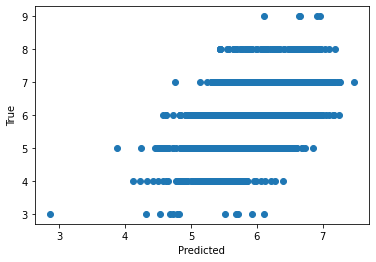

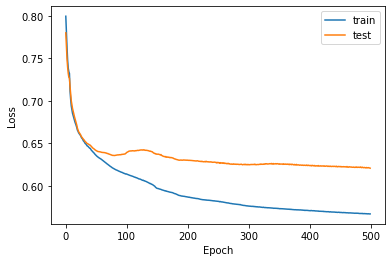

CPU times: user 1min 10s, sys: 1.99 s, total: 1min 12s
Wall time: 1min 10s


In [ ]:
%%time
# The code below implements the training.
# If you correctly implement  dnn and update_weights above, 
# you should not need to change anything below. 
# (apart from increasing the number of epochs)

train_losses = []
test_losses = []

# How many epochs to train
# This will just train for one epoch
# You will want a higher number once everything works
n_epochs = 500

# Loop over the epochs
for ep in range(n_epochs):
        
    # Each epoch is a complete over the training data
    for i in range(X_train.shape[0]):
        
        # pick one example
        x = X_train[i]
        y = y_train[i]
#         print('new sample...')
        # use it to update the weights
        W,b,Wp,bp = update_weights(x,y,W,b,Wp,bp)
#         print(W,b,Wp,bp)
    # Calculate predictions for the full training and testing sample
    y_pred_train = [dnn(x,W,b,Wp,bp)[0] for x in X_train]
    y_pred = [dnn(x,W,b,Wp,bp)[0] for x in X_test]

    # Calculate aver loss / example over the epoch
    train_loss = sum((y_pred_train-y_train)**2) / y_train.shape[0]
    test_loss = sum((y_pred-y_test)**2) / y_test.shape[0] 
    
    # print some information
    print("Epoch:",ep, "Train Loss:", train_loss, "Test Loss:", test_loss)
    
    # and store the losses for later use
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    
# After the training:
    

Best loss: 0.6207440978455863 Final loss: 0.6207440978455863
Correlation coefficient: 0.47201098289551785


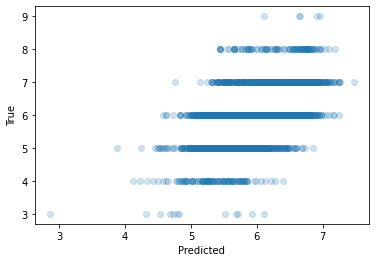

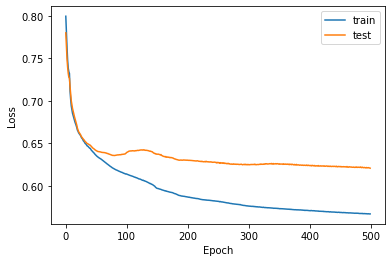

In [ ]:

# Prepare scatter plot
y_pred = [dnn(x,W,b,Wp,bp)[0] for x in X_test]

print("Best loss:", min(test_losses), "Final loss:", test_losses[-1])

print("Correlation coefficient:", np.corrcoef(y_pred,y_test)[0,1])
plt.scatter(y_pred_train,y_train, alpha = 0.2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Prepare and loss over time
plt.plot(train_losses,label="train")
plt.plot(test_losses,label="test")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


This works worse than the linear regression ... 
well it does predict something so I guess now its bug-free
the process is highly depedent on the learning rate :

too large learning rates just converge to a single value ~6 as a prediction... 
smaller learning rates seem to do the trick better. 



# Hint 1

We want a network with one hidden layer. As activiation in the hidden layer $\sigma$ we apply element-wise ReLu, while no activation is used for the output layer. The forward pass of the network then reads:
$$\hat{y}=\mathbf{W}^{\prime} \sigma(\mathbf{W} \vec{x}+\vec{b})+b^{\prime}$$

# Hint 2

For the regression problem the objective function is the mean squared error between the prediction and the true label $y$: 
$$
L=(\hat{y}-y)^{2}
$$

Taking the partial derivatives - and diligently the applying chain rule - with respect to the different objects yields:

$$
\begin{aligned}
\frac{\partial L}{\partial b^{\prime}} &=2(\hat{y}-y) \\
\frac{\partial L}{\partial b_{k}} &=2(\hat{y}-y) \mathbf{W}_{k}^{\prime} \theta\left(\sum_{i} \mathbf{W}_{i k} x_{i}+b_{k}\right) \\
\frac{\partial L}{\partial \mathbf{W}_{k}^{\prime}} &=2(\hat{y}-y) \sigma\left(\sum_{i} \mathbf{W}_{i k} x_{i}+b_{k}\right) \\
\frac{\partial L}{\partial \mathbf{W}_{k m}} &=2(\hat{y}-y) \mathbf{W}_{m}^{\prime} \theta\left(\sum_{i} \mathbf{W}_{i m} x_{i}+b_{m}\right) x_{k}
\end{aligned}
$$

Here, $\Theta$ denotes the Heaviside step function.